In [53]:
import os

import numpy as np

# For DataFrame object
import pandas as pd

# Neural Network
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

# Text Vectorizing
from keras.preprocessing.text import Tokenizer

# Train-test-split
from sklearn.model_selection import train_test_split

# History visualization
%matplotlib inline
import matplotlib.pyplot as plt

# Normalize
from sklearn.preprocessing import normalize
        
print(os.listdir("./input"))


['labeled.csv']


In [38]:
print(os.listdir("./input"))

['labeled.csv']


In [39]:
path = './input/labeled.csv'
df = pd.read_csv(path)
df.head()

,comment,toxic
0,"Верблюдов-то за что? Дебилы, бл...\n",1.0
1,"Хохлы, это отдушина затюканого россиянина, мол...",1.0
2,Собаке - собачья смерть\n,1.0
3,"Страницу обнови, дебил. Это тоже не оскорблени...",1.0
4,"тебя не убедил 6-страничный пдф в том, что Скр...",1.0


In [40]:
def delete_new_line_symbols(text):
    text = text.replace('\n', ' ')
    return text

In [41]:
df['comment'] = df['comment'].apply(delete_new_line_symbols)
df.head()

,comment,toxic
0,"Верблюдов-то за что? Дебилы, бл...",1.0
1,"Хохлы, это отдушина затюканого россиянина, мол...",1.0
2,Собаке - собачья смерть,1.0
3,"Страницу обнови, дебил. Это тоже не оскорблени...",1.0
4,"тебя не убедил 6-страничный пдф в том, что Скр...",1.0


In [42]:
target = np.array(df['toxic'].astype('uint8'))
target[:5]


array([1, 1, 1, 1, 1], dtype=uint8)

In [43]:
tokenizer = Tokenizer(num_words=20000, 
                      filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', 
                      lower=True, 
                      split=' ', 
                      char_level=False)

In [44]:
tokenizer.fit_on_texts(df['comment'])
matrix = tokenizer.texts_to_matrix(df['comment'], mode='count')
matrix.shape


(14412, 20000)

In [45]:
def get_model():
    
    model = Sequential()
    
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(16, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(optimizer=RMSprop(lr=0.0001), 
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    
    return model

In [46]:
matrix = normalize(matrix)
y = target

X_train, X_test, y_train, y_test = train_test_split(matrix, y, test_size=0.2)

X_train.shape, y_train.shape

((11529, 20000), (11529,))

In [47]:
model = get_model()

history = model.fit(X_train, y_train, epochs=150, batch_size=500, validation_data=(X_test, y_test))

Train on 11529 samples, validate on 2883 samples
Epoch 1/150
11529/11529 [==============================] - 15s 1ms/step - loss: 0.6880 - acc: 0.6655 - val_loss: 0.6831 - val_acc: 0.6615
Epoch 2/150
11529/11529 [==============================] - 5s 450us/step - loss: 0.6792 - acc: 0.6661 - val_loss: 0.6746 - val_acc: 0.6615
Epoch 3/150
11529/11529 [==============================] - 3s 257us/step - loss: 0.6708 - acc: 0.6661 - val_loss: 0.6665 - val_acc: 0.6615
Epoch 4/150
11529/11529 [==============================] - 3s 245us/step - loss: 0.6631 - acc: 0.6661 - val_loss: 0.6582 - val_acc: 0.6615
Epoch 5/150
11529/11529 [==============================] - 5s 451us/step - loss: 0.6537 - acc: 0.6661 - val_loss: 0.6501 - val_acc: 0.6615
Epoch 6/150
11529/11529 [==============================] - 4s 312us/step - loss: 0.6461 - acc: 0.6661 - val_loss: 0.6417 - val_acc: 0.6615
Epoch 7/150
11529/11529 [==============================] - 3s 299us/step - loss: 0.6365 - acc: 0.6661 - val_loss: 0.63

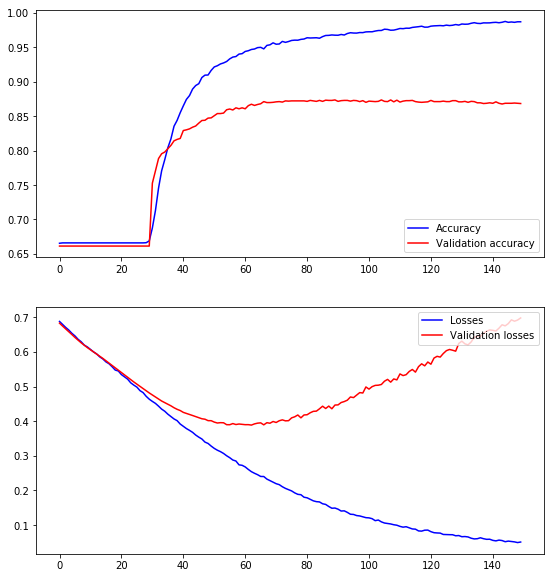

In [50]:
#history = history.history

fig = plt.figure(figsize=(20, 10))

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(223)

x = list(range(150))
#ax1.set_xticklabels(x)
ax1.plot(x, history['acc'], 'b-', label='Accuracy')
ax1.plot(x, history['val_acc'], 'r-', label='Validation accuracy')

ax1.legend(loc='lower right')
#ax2.set_xticklabels(x)
ax2.plot(x, history['loss'], 'b-', label='Losses')
ax2.plot(x, history['val_loss'], 'r-', label='Validation losses')

ax2.legend(loc='upper right')
plt.show()

In [51]:
score = model.evaluate(X_test, y_test)
print("Test score: ", score[0])
print("Test accuracy: ", score[1])

2883/2883 [==============================] - 1s 236us/step
Test score:  0.698481393460006
Test accuracy:  0.8681928546652792


In [52]:

print(model.predict(tokenizer.texts_to_matrix(["СИ"])))
print(model.predict(tokenizer.texts_to_matrix(["Что делать, если статус отчетности не меняется длительное время?"])))
print(model.predict(tokenizer.texts_to_matrix(["Какой действует порядок в случае изменения реквизитов внешнего пользователя (наименование, ИНН, ОГРН) либо для него не зарегистрирован ЛК?"])))
print(model.predict(tokenizer.texts_to_matrix(["Какой действует порядок по увеличению квоты хранения истории обмена ЭС?"])))
print(model.predict(tokenizer.texts_to_matrix(["Я получил отказ в регистрации документа. Каковы причины отказа?"])))


[[0.9015032]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]


In [20]:
def isNotGood(str):
    v = model.predict(tokenizer.texts_to_matrix([str]))
    if v > 0.7:
        print("Ругательства")
    if v <= 0.7 and v > 0.3:
        print("Средне")
    if v <= 0.3:
        print("Конструктивная речь")


In [34]:
isNotGood("Си")

Ругательства


In [2]:
gc.collect()

22